In [86]:
from pyproj import transform, Proj
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

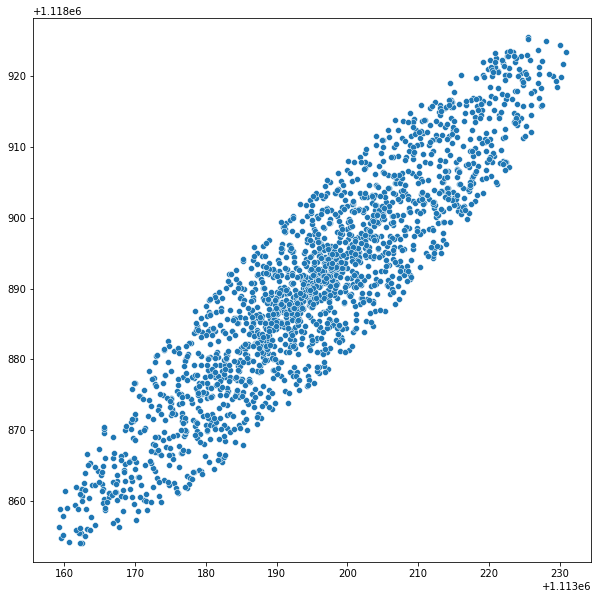

In [87]:
def trans(lat, lon):
    return(transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), lon, lat))

def ellp(lat, lon, smaj, smin, rot):
    return(trans(lon, lat), smaj, smin, rot)

def dists(mean, sma, smi, a, d, norm=True):
    theta = np.radians(a)

    if norm == True:
        rp = np.random.rand(1, d)
    else:
        rp = np.sqrt(np.random.rand(1, d))

    phi = np.random.rand(1,d)*2*np.pi

    x_c = rp*np.cos(phi)
    y_c = rp*np.sin(phi)

    x_e = x_c * sma
    y_e = y_c * smi

    x = np.array(x_e*np.cos(theta) - y_e*np.sin(theta)) + mean[1]
    y = np.array(x_e*np.sin(theta) + y_e*np.cos(theta)) + mean[0]

    return(y,x)

j = ellp(10, 10, 10, 50 , -45)
f = dists(j[0], j[1], j[2], j[3], 2000, norm=True)

x, y = f[0][0], f[1][0]

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=x, y=y)
plt.axis('equal')
plt.show()

In [88]:
X = np.stack((x, y), axis=0)

In [96]:
print(np.var(x))
print(np.var(y))

215.49104596239357
216.7257224519759


In [89]:
mu_x = np.mean(x)
mu_y = np.mean(y)
C = np.cov(X)

In [90]:
print(mu_x)
print(mu_y)
print(C)

1113195.258770731
1118890.3591548442
[[215.59884539 197.90823161]
 [197.90823161 216.83413952]]


In [91]:
C_inv = np.linalg.inv(C)
C_inv

array([[ 0.02860034, -0.02610402],
       [-0.02610402,  0.02843741]])

In [117]:
print(max(y)-mu_y)
print(np.sqrt(C[1][1]))
print(C[1][0])
print(np.sqrt(C[1][0]))

35.18217080691829
14.725289115047515
197.90823161311695
14.067986053913934


In [134]:
def md(x, mu, cov):
    assert len(X) == len(mu)
    d = np.sqrt((x-mu).dot(np.linalg.inv(cov)).dot(x-mu))
    return d

In [136]:
md(np.array([x[0],y[0]]), np.array([mu_x, mu_y]), C)

0.48851845919326836

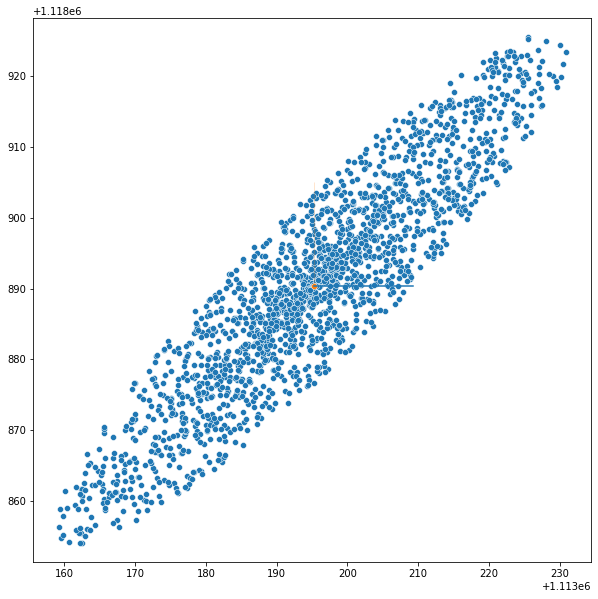

In [121]:
plt.figure(figsize=(10,10))
# ax = plt.gca()
# plt.scatter(x, y, c='k', s=1, alpha=.5)
# plt.axline()
ax = sns.scatterplot(x=x, y=y)
bx = sns.scatterplot(x=np.array([mu_x]), y=np.array(mu_y))
# cx = sns.lineplot(x=[mu_x, mu_x], y=[mu_y, max(y)])
dx = sns.lineplot(x=[mu_x, mu_x + np.sqrt(C[1][0])], y=[mu_y, mu_y])
dx = sns.lineplot(x=[mu_x, mu_x], y=[mu_y, mu_y + np.sqrt(C[1][1])])
# cx = sns.lineplot(x=np.array([mu_x - C[0][0], mu_x + C[0][0]]), y=np.array([mu_y, mu_y]))
# dx = sns.lineplot(x=np.array([mu_x, mu_x]), y=np.array([mu_y - C[1][1], mu_y + C[1][1]]))
# ax.add_patch(Ellipse(xy=[mu_x, mu_y], width=np.sqrt(C[0][0]), height=np.sqrt(C[1][1]), angle=0, edgecolor='b', fc='None', lw=2, zorder=4))
plt.axis('equal')
plt.show()